In [1]:
%load_ext iminizinc
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import *
from IPython.display import display
import IPython
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime
# import talib
import pandas_ta as ta
# from talib.abstract import *
from math import *
from collections import OrderedDict
# import vectorbt as vbt    
import json
from decimal import *
getcontext().prec = 6
import seaborn as sns
from scipy.signal import find_peaks, peak_widths


import sys, os
sys.path.append(os.path.abspath('../..'))
from research.pkg.lib import *


# import mplfinance as mpf
%matplotlib inline

mpl.rcParams.update({'font.size': 5, 'lines.linewidth': 0.5, 'figure.dpi': 200, 'lines.markersize': 4})
# plt.rcParams['lines.linewidth'] = 0.5 



<IPython.core.display.Javascript object>

MiniZinc to FlatZinc converter, version 2.7.6, build 905165378
Copyright (C) 2014-2023 Monash University, NICTA, Data61


In [77]:

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
from research.pkg.adspy_shared_utilities import *


In [44]:
exchange = 'kucoin'
pair = 'BTC_USDT'
timeframe = '4h'

odf = pd.read_json(f'../../freq-user-data/data/{exchange}/futures/{pair}-{timeframe}-futures.json').dropna()
odf.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

odf['date'] = pd.to_datetime(odf['timestamp'], unit='ms', utc=False)
# df.index = df['time']
# df.set_index('time', drop=True, inplace=True)
odf['idate'] = odf.date.dt.strftime('%Y%m%d')
odf.set_index(pd.DatetimeIndex(odf["date"]), inplace=True, drop=True)
# df = df[['time', 'symbol', 'source', 'resolution', 'open', 'high', 'low', 'close', 'volume']]
# df.to_csv (r'./data/binance/BTC_USDT-5m.csv', index = None)
# df.set_index('time')
odf.sort_index(inplace=True)

odf.head(8)

,timestamp,open,high,low,close,volume,date,idate
date,,,,,,,,
2020-01-01 00:00:00,1577836800000,7196.2,7243.2,7176.1,7225.4,62.743859,2020-01-01 00:00:00,20200101
2020-01-01 04:00:00,1577851200000,7225.4,7233.8,7203.1,7209.5,36.248625,2020-01-01 04:00:00,20200101
2020-01-01 08:00:00,1577865600000,7209.4,7232.0,7183.0,7195.6,52.545595,2020-01-01 08:00:00,20200101
2020-01-01 12:00:00,1577880000000,7195.7,7251.8,7195.6,7231.4,69.704852,2020-01-01 12:00:00,20200101
2020-01-01 16:00:00,1577894400000,7231.5,7248.0,7217.1,7229.0,60.889127,2020-01-01 16:00:00,20200101
2020-01-01 20:00:00,1577908800000,7229.0,7240.0,7180.0,7200.2,88.462003,2020-01-01 20:00:00,20200101
2020-01-02 00:00:00,1577923200000,7200.3,7210.6,7119.5,7125.6,106.717570,2020-01-02 00:00:00,20200102
2020-01-02 04:00:00,1577937600000,7126.2,7158.3,7104.1,7108.8,134.437394,2020-01-02 04:00:00,20200102


In [5]:
odf.shape

(7701, 8)

In [130]:

wdf

,timestamp,open,high,low,close,volume,date,idate,fu_max_pct,fu_min_pct,...,uband,umar,la_min,la_max,bou,bod,wiu_pct,wid_pct,la_min_pct,la_max_pct
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03 20:00:00,1578081600000,7338.0,7357.1,7261.6,7346.2,173.514194,2020-01-03 20:00:00,20200103,0.007187,-0.010169,...,NaN,NaN,NaN,NaN,7346.2,7338.0,0.001484,-0.011516,NaN,NaN
2020-01-04 00:00:00,1578096000000,7344.6,7349.1,7285.0,7332.9,103.055282,2020-01-04 00:00:00,20200104,0.020974,-0.008373,...,NaN,NaN,NaN,NaN,7344.6,7332.9,0.000613,-0.008115,NaN,NaN
2020-01-04 04:00:00,1578110400000,7332.7,7363.9,7313.6,7348.0,96.916996,2020-01-04 04:00:00,20200104,0.019325,-0.010411,...,NaN,NaN,NaN,NaN,7348.0,7332.7,0.002164,-0.004682,NaN,NaN
2020-01-04 08:00:00,1578124800000,7347.9,7365.0,7304.3,7335.1,95.815779,2020-01-04 08:00:00,20200104,0.021118,-0.008671,...,NaN,NaN,NaN,NaN,7347.9,7335.1,0.002327,-0.005934,NaN,NaN
2020-01-04 12:00:00,1578139200000,7335.1,7335.2,7290.0,7322.6,123.420437,2020-01-04 12:00:00,20200104,0.022861,-0.006978,...,NaN,NaN,NaN,NaN,7335.1,7322.6,0.000014,-0.006149,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05 16:00:00,1688572800000,30354.7,30589.0,30336.4,30428.8,654.494189,2023-07-05 16:00:00,20230705,0.035857,-0.017861,...,31150.720363,-0.0,30354.6,31259.4,30428.8,30354.7,0.005265,-0.003037,-0.002438,0.027297
2023-07-05 20:00:00,1688587200000,30428.8,30539.5,30391.1,30504.3,398.457535,2023-07-05 20:00:00,20230705,0.033294,-0.021272,...,31102.349106,-0.0,30354.6,31259.4,30504.3,30428.8,0.001154,-0.003711,-0.004908,0.024754
2023-07-06 00:00:00,1688601600000,30503.9,30560.0,30332.0,30492.0,292.351942,2023-07-06 00:00:00,20230706,0.033710,-0.025941,...,30953.581570,-0.0,30354.6,31259.4,30503.9,30492.0,0.001839,-0.005635,-0.004506,0.025167


In [186]:
lag = 6 * 3
stdn = 6 * 1

fu = 6 * 2
wdf = odf.copy()
wdf.loc[:,'fu_max'] = wdf.high.rolling(fu).max()
wdf.loc[:,'fu_min'] = wdf.low.rolling(fu).min()
wdf.loc[:,'fu_max_pct'] = wdf.fu_max.shift(-fu) / wdf.close -1
wdf.loc[:,'fu_min_pct'] = wdf.fu_min.shift(-fu) / wdf.close  -1
wdf = wdf.dropna()
wdf.loc[:,'fu_max1000'] = wdf.fu_max_pct.multiply(1000).apply(np.ceil).astype(int)
wdf.loc[:,'fu_min1000'] = wdf.fu_min_pct.multiply(1000).apply(np.floor).astype(int)

wdf['ema'] = wdf.close.ewm(span=lag).mean()

wdf['vola'] = wdf.close.rolling(stdn).std()
wdf['dband'] = wdf['ema'] - 2 * wdf.vola
wdf['uband'] = wdf['ema'] + 2 * wdf.vola
wdf['la_min'] = wdf.close.rolling(lag).min()
wdf['la_max'] = wdf.close.rolling(lag).max()
wdf['la_min_pct'] = wdf.la_min.divide(wdf.close).subtract(1)
wdf['la_max_pct'] = wdf.la_max.divide(wdf.close).subtract(1)

wdf['umar'] = wdf.close.divide(wdf.uband).subtract(1)
wdf['dmar'] = wdf.close.divide(wdf.dband).subtract(1)

wdf['bou'] = wdf[['open','close']].max(axis=1)
wdf['bod'] = wdf[['open','close']].min(axis=1)

wdf['wiu_pct'] = wdf.high.divide(wdf.bou) - 1
wdf['wid_pct'] = wdf.low.divide(wdf.bou) - 1

wdf.tail(5)

,timestamp,open,high,low,close,volume,date,idate,fu_max_pct,fu_min_pct,...,la_min,la_max,la_min_pct,la_max_pct,umar,dmar,bou,bod,wiu_pct,wid_pct
date,,,,,,,,,,,,,,,,,,,,,
2023-07-04 16:00:00,1688486400000,30959.8,31133.0,30621.5,30695.5,980.988951,2023-07-04 16:00:00,20230704,0.026857,-0.026395,...,30498.1,31259.4,-0.006431,0.018371,-0.015912,0.007851,30959.8,30695.5,0.005594,-0.010927
2023-07-04 20:00:00,1688500800000,30695.4,30844.0,30669.4,30765.9,326.870735,2023-07-04 20:00:00,20230704,0.024508,-0.029594,...,30498.1,31259.4,-0.008704,0.016040,-0.013535,0.010443,30765.9,30695.4,0.002539,-0.003137
2023-07-05 00:00:00,1688515200000,30765.9,30880.0,30749.9,30866.0,245.560961,2023-07-05 00:00:00,20230705,0.021185,-0.037744,...,30498.1,31259.4,-0.011919,0.012745,-0.007209,0.010148,30866.0,30765.9,0.000454,-0.003761
2023-07-05 04:00:00,1688529600000,30866.1,30867.9,30763.6,30771.5,263.492928,2023-07-05 04:00:00,20230705,0.024321,-0.034789,...,30498.1,31259.4,-0.008885,0.015856,-0.010404,0.007573,30866.1,30771.5,0.000058,-0.003321
2023-07-05 08:00:00,1688544000000,30771.5,30802.2,30343.7,30402.9,925.915016,2023-07-05 08:00:00,20230705,0.036740,-0.023087,...,30402.9,31259.4,0.000000,0.028172,-0.024120,0.000307,30771.5,30402.9,0.000998,-0.013902


In [187]:
wdf[(wdf.high >= wdf.uband) & (wdf.close >= wdf.open) & (wdf.umar.abs() <= 0.005)][['wiu_pct']].describe()

,wiu_pct
count,701.000000
mean,0.005086
std,0.004330
min,0.000000
25%,0.002172
50%,0.003839
75%,0.006924
max,0.033025


In [188]:
wdf[(wdf.high >= wdf.uband) & (wdf.close >= wdf.open) & (wdf.umar.abs() <= 0.005) & wdf.wiu_pct > 0.04][['fu_min_pct','fu_max_pct']].describe()

,fu_min_pct,fu_max_pct
count,698.000000,698.000000
mean,-0.031963,0.037436
std,0.032550,0.039613
min,-0.287512,0.000000
25%,-0.045523,0.010984
50%,-0.022685,0.024870
75%,-0.008891,0.048257
max,0.000002,0.270270


In [170]:
wdf.shape

(7690, 26)

In [158]:

gdf = wdf[(wdf.high >= wdf.uband)]
# plt.scatter(gdf.fu_max_pct, -gdf.fu_min_pct, s=2)

In [162]:
tdf = wdf[(wdf.high >= wdf.uband) & (wdf.close >= wdf.open) & (wdf.umar.abs() <= 0.005)]
levels = tdf[['fu_min_pct','fu_max_pct']].describe()
levels
# tdf.pnl_pct = 

,fu_min_pct,fu_max_pct
count,2678.000000,2678.000000
mean,-0.026337,0.025916
std,0.028696,0.027281
min,-0.287512,-0.000065
25%,-0.033545,0.007894
50%,-0.017934,0.018084
75%,-0.008425,0.033600
max,0.000682,0.227842


In [156]:
tp = levels.loc['50%', 'fu_min_pct']
sl = levels.loc['50%', 'fu_max_pct'] #* 0.05
tp,sl
tdf.pnl = np.where(
    tdf.high.rolling(fu).max().fu_max_pct
)

(-0.02026963523010894, 0.018908478906654036)

In [153]:
# sig = wdf.laWlpct_12 >= 0.02
# pct_risk = 0.2
posind = None
sl, tp, inprice = None, None, None
tdf['rpnl'] = 0
for ind, row in tdf.iterrows():
    if posind is None:
        if sig[ind]:
            sl = row.close * (1 - 0.05)
            tp = row.close * (1 + 0.2)
            inprice = row.close
            posind = ind
    else:
        # pos = pct_risk * ( (inprice - sl) / inprice) * (1 - 0.001)
        if row.low <= sl:
            tdf.at[ind, 'rpnl'] = log(sl/inprice) + log(1 - 0.001)
            posind = None
        elif row.high >= tp:
            tdf.at[ind, 'rpnl'] = log(tp/inprice) + log(1 - 0.001)
            posind = None

fig, ax1 = plt.subplots(figsize=(12,5))

tdf.rpnl.cumsum().plot(ax=ax1, c='g')
ax2 = ax1.twinx()
# ax2.plot(wdf.close)
tdf.close.plot(ax=ax2)
    # print(row['c1'], row['c2'])
# sig

AttributeError: 'DataFrame' object has no attribute 'laWlpct_12'

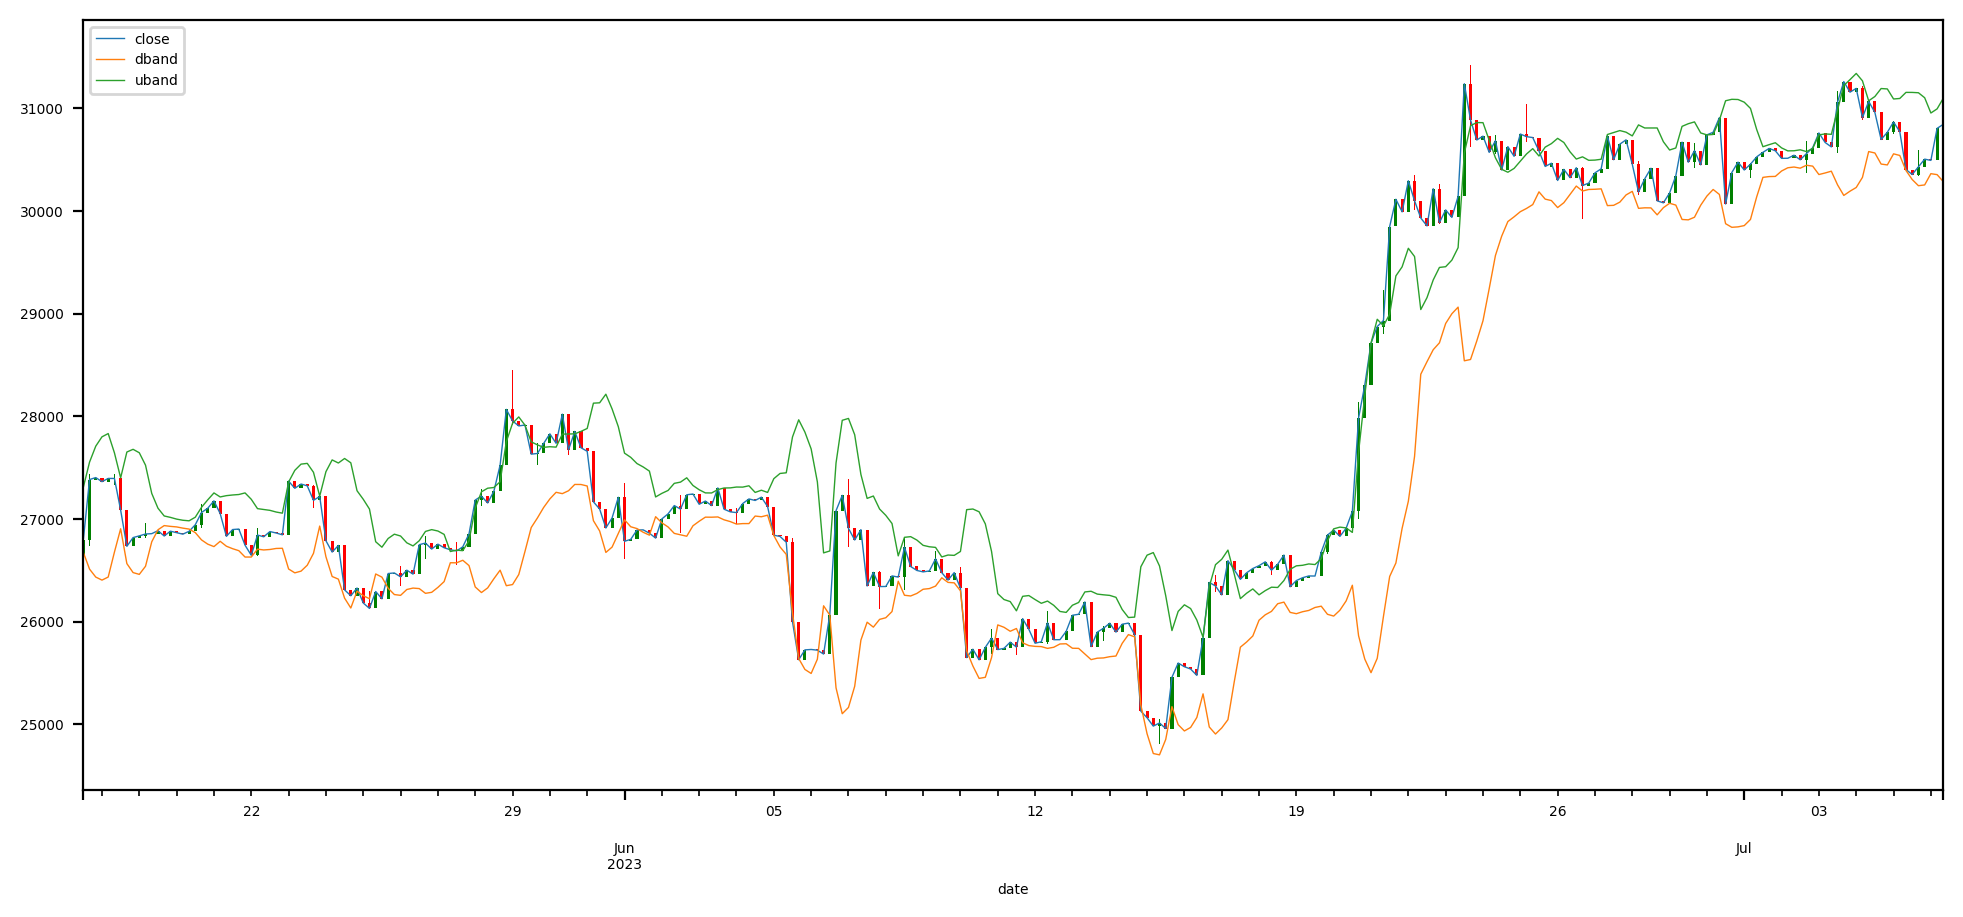

In [119]:
gdf = wdf.tail(300)
ax=gdf[['close','dband','uband']].plot(figsize=(12,5))
plot_candles(gdf, ax=ax)

In [126]:

wdf.tail(5)

,timestamp,open,high,low,close,volume,date,idate,fu_max_pct,fu_min_pct,...,vola,dband,uband,umar,la_min,la_max,bou,bod,wiu_pct,wid_pct
date,,,,,,,,,,,,,,,,,,,,,
2023-07-05 16:00:00,1688572800000,30354.7,30589.0,30336.4,30428.8,654.494189,2023-07-05 16:00:00,20230705,0.035857,-0.017861,...,226.297321,30245.531078,31150.720363,-0.0,30354.6,31259.4,30428.8,30354.7,0.005265,-0.003037
2023-07-05 20:00:00,1688587200000,30428.8,30539.5,30391.1,30504.3,398.457535,2023-07-05 20:00:00,20230705,0.033294,-0.021272,...,212.313046,30253.096920,31102.349106,-0.0,30354.6,31259.4,30504.3,30428.8,0.001154,-0.003711
2023-07-06 00:00:00,1688601600000,30503.9,30560.0,30332.0,30492.0,292.351942,2023-07-06 00:00:00,20230706,0.033710,-0.025941,...,147.704174,30362.764874,30953.581570,-0.0,30354.6,31259.4,30503.9,30492.0,0.001839,-0.005635
2023-07-06 04:00:00,1688616000000,30492.1,30856.8,30438.4,30804.0,608.323159,2023-07-06 04:00:00,20230706,0.023240,-0.035807,...,160.067219,30353.388971,30993.657848,-0.0,30354.6,31259.4,30804.0,30492.1,0.001714,-0.011869
2023-07-06 08:00:00,1688630400000,30803.9,31519.9,30702.7,30843.3,1894.845509,2023-07-06 08:00:00,20230706,0.001148,-0.037036,...,203.064430,30285.265770,31097.523489,-0.0,30354.6,31259.4,30843.3,30803.9,0.021937,-0.004559


In [127]:
wdf = wdf.dropna()


In [128]:
# wdf['sig_uba'] = wdf[wdf.high >= wdf.uband].shift()


/tmp/ipykernel_329769/219185848.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(udf.umar, udf.fu_min1000/1000, s=2, cmap='Pastel1')


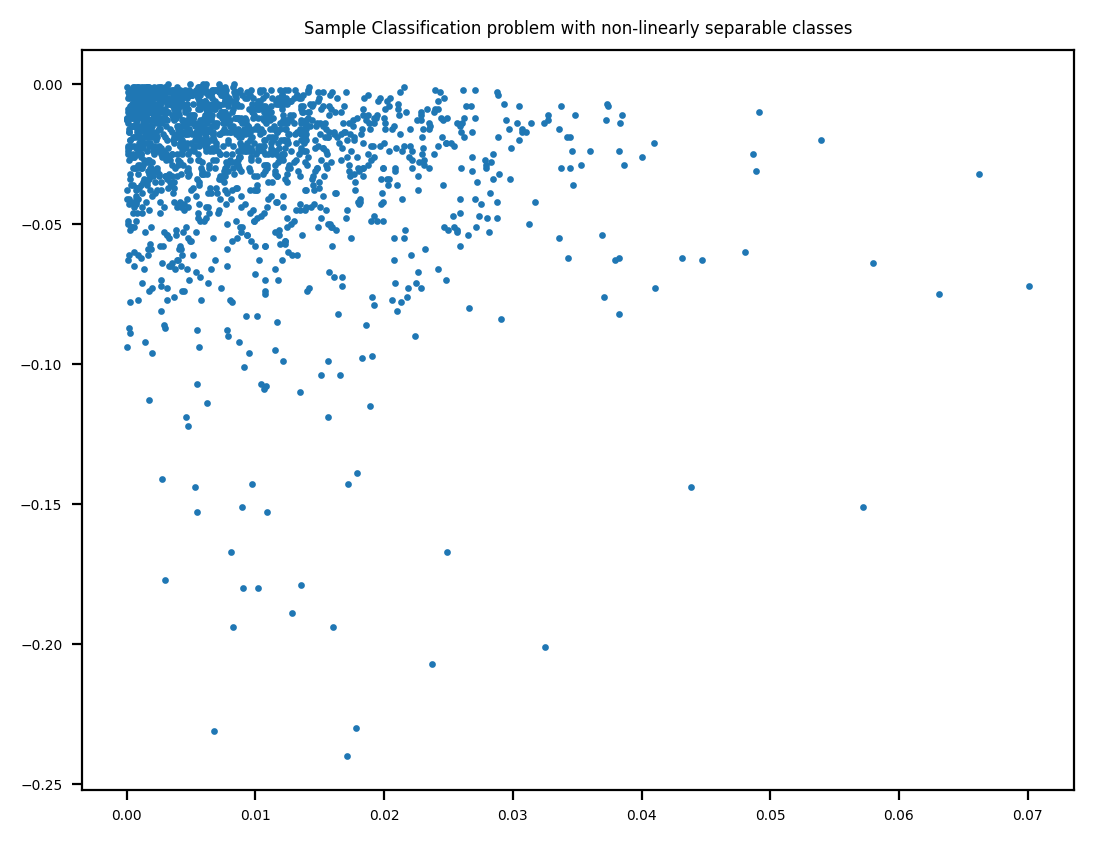

In [111]:

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample Classification problem with non-linearly separable classes')
plt.scatter(udf.umar, udf.fu_min1000/1000, s=2, cmap='Pastel1')
plt.show()

In [96]:
ladf = wdf[['']]

,timestamp,open,high,low,close,volume,date,idate,fu_max_pct,fu_min_pct,fu_max1000,fu_min1000,ema,vola,dband,uband,umar
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1577836800000,7196.2,7243.2,7176.1,7225.4,62.743859,2020-01-01 00:00:00,20200101,0.003654,-0.014657,4,-15,7225.400000,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,1577851200000,7225.4,7233.8,7203.1,7209.5,36.248625,2020-01-01 04:00:00,20200101,0.005867,-0.014620,6,-15,7217.008333,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,1577865600000,7209.4,7232.0,7183.0,7195.6,52.545595,2020-01-01 08:00:00,20200101,0.007810,-0.012716,8,-13,7209.065468,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,1577880000000,7195.7,7251.8,7195.6,7231.4,69.704852,2020-01-01 12:00:00,20200101,0.002296,-0.017604,3,-18,7215.612158,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,1577894400000,7231.5,7248.0,7217.1,7229.0,60.889127,2020-01-01 16:00:00,20200101,0.001522,-0.040905,2,-41,7218.915789,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 08:00:00,1688112000000,30765.8,30940.0,30720.0,30908.2,609.239516,2023-06-30 08:00:00,20230630,0.007047,-0.045561,8,-46,30522.144227,180.805757,30160.532714,30883.755741,0.000791
2023-07-02 20:00:00,1688328000000,30558.5,30788.0,30424.0,30615.1,603.732106,2023-07-02 20:00:00,20230702,0.024929,-0.001574,25,-2,30522.256261,43.030567,30436.195128,30608.317394,0.000222
2023-07-03 00:00:00,1688342400000,30615.2,30794.5,30590.1,30759.4,366.899917,2023-07-03 00:00:00,20230703,0.020121,-0.006258,21,-7,30547.218760,96.436606,30354.345548,30740.091972,0.000628
